In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [2]:
# Load the datasets
data_1 = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/entropy_log_Window_reduced.csv")
data_2 = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/entropy_log_Window_reduced.csv")
#data_1 = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/entropy_log_Window_Building_reduced.csv")
#data_2 = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/entropy_log_Window_Building_reduced.csv")

# Stack the two datasets on top of each other (concatenate rows)
stacked_df = pd.concat([data_1, data_2], ignore_index=True)
stacked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10313 entries, 0 to 10312
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Trial_ID                            10313 non-null  object 
 1   Collider_Name                       10313 non-null  object 
 2   Occurrence_Order                    10313 non-null  int64  
 3   Gaze_Sequence_Length                10313 non-null  int64  
 4   Overall_Transition_Entropy          10313 non-null  float64
 5   Transition_Entropy_Background       10313 non-null  float64
 6   Stationary_Entropy_Background       10313 non-null  float64
 7   Transition_Entropy_Task_Building    10234 non-null  float64
 8   Stationary_Entropy_Task_Building    10234 non-null  float64
 9   Transition_Entropy_Agent_Body       10230 non-null  float64
 10  Stationary_Entropy_Agent_Body       10230 non-null  float64
 11  Transition_Entropy_Agent_Face       4364 

In [3]:
stacked_df.Gaze_Sequence_Length.describe()

count    10313.000000
mean       187.499176
std         34.920724
min         12.000000
25%        176.000000
50%        193.000000
75%        209.000000
max        265.000000
Name: Gaze_Sequence_Length, dtype: float64

In [4]:
# Sort the data
stacked_df_ordered = stacked_df.sort_values(by=["Participant_ID", "Session", "Occurrence_Order"])

# Create Encounter_Order
stacked_df_ordered["Encounter_Order"] = (
    stacked_df_ordered.groupby(["Participant_ID", "Session", "Agent_ID"])
    .cumcount() + 1
)


In [5]:
stacked_df_ordered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10313 entries, 4383 to 9574
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Trial_ID                            10313 non-null  object 
 1   Collider_Name                       10313 non-null  object 
 2   Occurrence_Order                    10313 non-null  int64  
 3   Gaze_Sequence_Length                10313 non-null  int64  
 4   Overall_Transition_Entropy          10313 non-null  float64
 5   Transition_Entropy_Background       10313 non-null  float64
 6   Stationary_Entropy_Background       10313 non-null  float64
 7   Transition_Entropy_Task_Building    10234 non-null  float64
 8   Stationary_Entropy_Task_Building    10234 non-null  float64
 9   Transition_Entropy_Agent_Body       10230 non-null  float64
 10  Stationary_Entropy_Agent_Body       10230 non-null  float64
 11  Transition_Entropy_Agent_Face       4364 non

In [6]:
#stacked_df_ordered = stacked_df_ordered[stacked_df.Overall_Transition_Entropy > 0.01]

/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


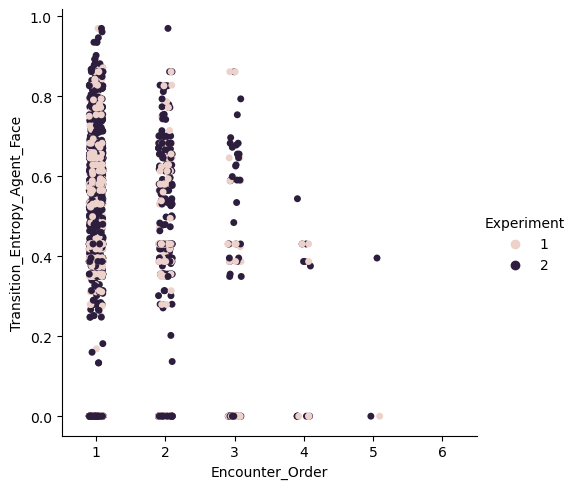

In [8]:
sns.catplot(x='Encounter_Order', y='Transition_Entropy_Agent_Face', hue='Experiment', data=stacked_df_ordered)

In [9]:
# Filter out values less than 0.001
filtered_df = stacked_df_ordered[stacked_df_ordered['Transition_Entropy_Agent_Face'] >= 0.001]

# Group by Agent_ID, Participant_ID, and Session
grouped_by_session = filtered_df.groupby(
    ['Agent_ID', 'Agent_Type', 'Participant_ID', 'Session', 'Experiment']
)['Transition_Entropy_Agent_Face'].agg(['min', 'max', 'median', 'mean']).reset_index()

# Group by Agent_ID and Participant_ID (not separated by Session)
grouped_without_session = filtered_df.groupby(
    ['Agent_ID', 'Agent_Type', 'Participant_ID', 'Experiment']
)['Transition_Entropy_Agent_Face'].agg(['min', 'max', 'median', 'mean']).reset_index()

grouped_for_LMM = filtered_df.groupby(
    ['Agent_ID', 'Agent_Type', 'Participant_ID', 'Experiment']
)['Transition_Entropy_Agent_Face'].agg(['min', 'max', 'median', 'mean']).reset_index()


In [ ]:
grouped_for_LMM.head()
grouped_for_LMM.to_csv("/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/grouped_for_LMM.csv")

In [ ]:
# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)
sns.boxplot(data=grouped_by_session, x='Agent_ID', y='mean', hue='Experiment', palette=experiment_palette)

In [ ]:
Coverage =  pd.read_csv('/Volumes/TwoTeras/Graph_Stuff/CSVs/Unique_NodeVisit_Ratios.csv')
# Force 'ParticipantID' to have 4 digits as a string
Coverage['ParticipantID'] = Coverage['ParticipantID'].apply(lambda x: f"{int(x):04d}")
display(Coverage.info())

Navigation = pd.read_csv("/Volumes/TwoTeras/Resources/Conservative_Explorative.csv", sep =",")
Navigation.head()

In [ ]:
grouped_by_session.head()

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_24522/4235266660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_by_session_Active["Experiment_Type"] = grouped_by_session_Active["Experiment"].apply(lambda x: "Congruent" if x == 1 else "Incongruent")


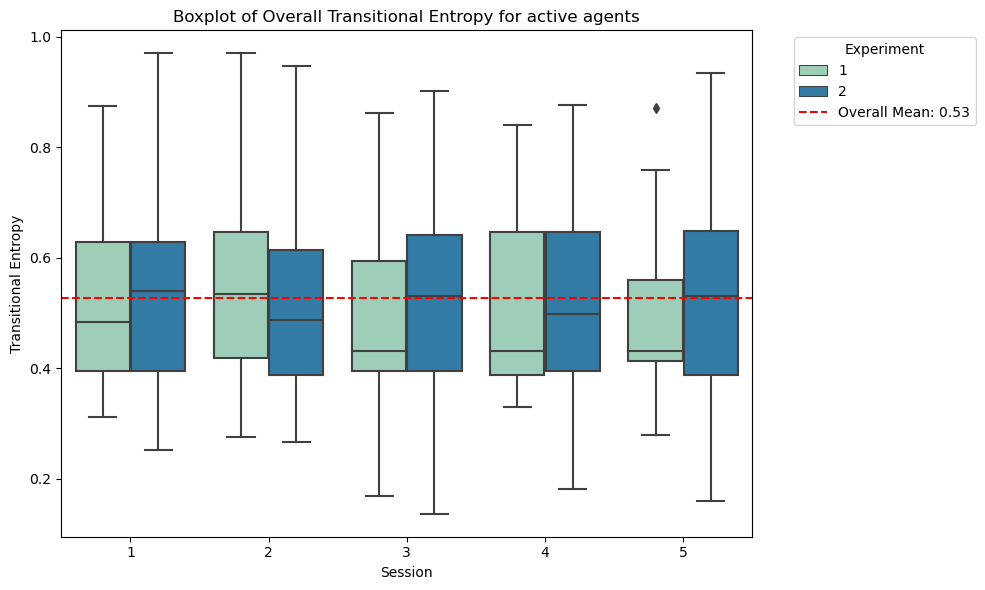

In [15]:


# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)
grouped_by_session_Active = grouped_by_session[grouped_by_session.Agent_Type == "Active"]
# Add a new column for Experiment_Type
grouped_by_session_Active["Experiment_Type"] = grouped_by_session_Active["Experiment"].apply(lambda x: "Congruent" if x == 1 else "Incongruent")


# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = grouped_by_session_Active['mean'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped_by_session, x='Session', y='mean', hue='Experiment', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Overall Transitional Entropy for active agents")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Experiment", loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [ ]:
# Generate color lists from YlGnBu palette based on the number of unique sessions
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()
palette = sns.color_palette("YlGnBu", max(num_sessions_1, num_sessions_2))

# Create subplots for side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(20, 16), sharey=True)

# Boxplot for Experiment 1
sns.boxplot(data=data_1, x='SessionNr', y='Overall_Transition_Entropy', ax=axes[0], palette=palette[:num_sessions_1])
axes[0].set_title("Boxplot Transition Entropy for Agent gazes by Session (Experiment 1)")
axes[0].set_xlabel("Session")
axes[0].set_ylabel("Stationary Entropy")

# Boxplot for Experiment 2
sns.boxplot(data=data_2, x='SessionNr', y='Overall_Transition_Entropy', ax=axes[1], palette=palette[:num_sessions_2])
axes[1].set_title("Boxplot of Transition Entropy for Agent gazes by Session (Experiment 2)")
axes[1].set_xlabel("Session")

plt.tight_layout()
plt.show()


In [ ]:
grouped_by_session_active = grouped_by_session[grouped_by_session.Agent_Type == "Active"]

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = grouped_by_session_active['mean'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped_by_session_active, x='Session', y='mean', hue='Experiment', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Agent gazes by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

In [11]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Experiment'] = 'Experiment_1'
data_2['Experiment'] = 'Experiment_2'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_Active_Agent'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='SessionNr', y='Transition_Entropy_Active_Agent', hue='Experiment', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Agent gazes by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

KeyError: 'SessionNr'

In [ ]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Condition'] = 'Congruent'
data_2['Condition'] = 'Incongruent'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_TaskBuilding_Public'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='SessionNr', y='Transition_Entropy_TaskBuilding_Public', hue='Condition', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Building_Public by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

In [ ]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Condition'] = 'Congruent'
data_2['Condition'] = 'Incongruent'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_Background'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='SessionNr', y='Transition_Entropy_Background', hue='Condition', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Background gazes by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

In [ ]:
Navigation = pd.read_csv("/Volumes/TwoTeras/Resources/Conservative_Explorative.csv", sep =",")
Navigation_Explor = Navigation[Navigation.Strategy == "Explorative"]
Navigation_Explor_Agent = Navigation[(Navigation.Strategy == "Explorative") & (Navigation.Decision == "AgentAtChosen")]
Exploration = pd.DataFrame(Navigation_Explor.groupby(["ParticipantId", "Session"])["StrategyPerc"].mean())
Exploration.reset_index(inplace=True)
Exploration_Agent = pd.DataFrame(Navigation_Explor_Agent.groupby(["ParticipantId", "Session"])["StrategyPerc"].mean())
Exploration_Agent.reset_index(inplace=True)
Exploration_Complete = pd.merge(Exploration, Exploration_Agent, on=['ParticipantId', 'Session'])
Exploration_Complete.rename({"ParticipantId": 'ParticipantID', "Session": "SessionNr", "StrategyPerc_x": "Exploration_General", "StrategyPerc_y": "Exploration_Agent", }, axis=1, inplace=True)
Exploration_Complete['ParticipantID'] = Exploration_Complete['ParticipantID'].apply(lambda x: f"{int(x):04d}")
Exploration_Complete.head()

In [ ]:
# Generate color lists from YlGnBu palette based on the number of unique sessions
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()
palette = sns.color_palette("YlGnBu", max(num_sessions_1, num_sessions_2))

# Create subplots for side-by-side KDE plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# KDE for Experiment 1
sns.kdeplot(data=data_1, x='Overall_Transition_Entropy', hue='SessionNr', fill=True, ax=axes[0],
            palette=palette[:num_sessions_1])
axes[0].set_title("KDE Plot of Stationary Entropy by Session (Experiment 1)")
axes[0].set_xlabel("Transition Entropy")
axes[0].set_ylabel("Density")

# KDE for Experiment 2
sns.kdeplot(data=data_2, x='Overall_Transition_Entropy', hue='SessionNr', fill=True, ax=axes[1],
            palette=palette[:num_sessions_2])
axes[1].set_title("KDE Plot of Stationary Entropy by Session (Experiment 2)")
axes[1].set_xlabel("Transition Entropy")

plt.tight_layout()
plt.show()


In [ ]:
# Merging the dataframes on 'SubjectID' and 'SessionNr'
merged_df = pd.merge(stacked_df, Coverage, on=['ParticipantID', 'SessionNr'])
Exploration_Entropy = pd.merge(merged_df, Exploration_Complete, on=['ParticipantID', 'SessionNr']) 
Exploration_Entropy.head()

In [ ]:
Corr = Exploration_Entropy[["Exploration_General", "Exploration_Agent", "Stationary_Entropy_Passive_Agent",  "Stationary_Entropy_Active_Agent"]].corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Corr, annot=True, cmap="coolwarm", square=True, cbar_kws={'shrink': .8}, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
plt.figure(figsize=(25,15))
sns.set(font_scale = 1.3)
sns.regplot(x='Stationary_Entropy_Active_Agent', y='Exploration_General',
                data=Exploration_Entropy)
sns.regplot(x='Stationary_Entropy_Active_Agent', y='Exploration_Agent',
                data=Exploration_Entropy)